# 2 Ridge Regression

**STOP: If you have not completed Problem 1, please do that first!**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import fixed
from tqdm import tqdm

We will be using data and functions from the previous problem.

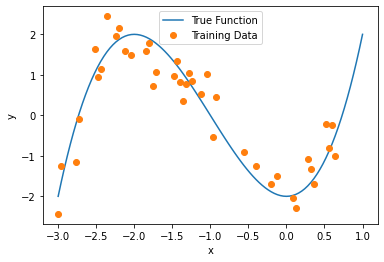

In [ ]:
# Functions that we will need
def generate_data(x_range, func, sigma=1, n=80):
    y_range = np.array([func(x) + np.random.normal(0, sigma) for x in x_range])
    random_indicies = np.arange(len(x_range))
    np.random.shuffle(random_indicies)
    x = x_range[random_indicies[:n]]
    y = y_range[random_indicies[:n]]
    return x, y

def get_features(d, x_scalars):
    X = []
    for x in x_scalars:
        X.append([x**i for i in range(d+1)])
    return np.array(X)

def mse(y_pred, y):
    return np.mean((y_pred - y)**2)

# Datapoints
x_range = np.linspace(-3, 1, 101, endpoint=True)
func = lambda x: x**3 + 3*x**2 - 2
np.random.seed(123)
x, y = generate_data(x_range, func, 0.4, 80)

# Training and validation set split, we'll just use 50/50 in this case
N = 40
x_train = x[:N] 
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]

plt.plot(x_range, func(x_range), label='True Function')
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2.1 Closed Form Solution

We've seen how when our data is noisy, making our model more complex can actually make our predictions worse. So how can we account for this when we don't know the true model? One strategy is to control the complexity of the model by adding a penalty for weight vectors with higher magnitudes. Let us add a term to the OLS optimization problem that will penalize the weights if they get too large.

Optimization Problem: $\underset{\lambda}{\text{min }} \|y - Xw \|_2^2 + \lambda \|w\|_2^2$

Closed Form Solution: $\hat{w} = (X^TX + \lambda I)^{-1}X^T\vec{y}$

We refer to this method as **Ridge Regression**. 

**2.1.1. One way we can derive the closed form solution for Ridge Regression is by setting the derivative of the optimization problem to 0 and solving for $w$. Given that the derivative of $\underset{\lambda}{\text{min }} \|y - Xw \|_2^2 + \lambda \|w\|_2^2$ with respect to $w$ is:**

  $$-2X^Ty+2X^TXw+2\lambda w$$

  **Show the derivation for the closed form solution above.**

YOUR ANSWER HERE: 

$$\begin{align}
0&=-2X^Ty+2X^TXw+2\lambda w \\
X^Ty&=X^TXw+\lambda w \\
X^Ty&=(X^TX+\lambda I)w \\
w&=(X^TX+\lambda I)^{-1}X^Ty
\end{align}$$

Now let us try to fit the same training data as before with a degree 7 polynomial, except this time we will use Ridge Regression instead of OLS.

As an additional note, we suggest you use sklearn to confirm that your ridge implementation was done correctly. The ridge implementation for the sklearn is similar to the OLS version except now you have to pass in a lambda parameter when creating the model. You can use the sklearn method to make sure that your `w_ridge` and the sklearn ridge regression output the same weights. However you are NOT allowed to use any sklearn in the `ridge` function itself. Simply use sklearn as a tool to ensure that your implementation was right. Use the following link for documention of the sklearn method:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**2.1.2. Fill in the code below to implement ridge regression using *only* numpy. We have also implemented the sklearn version of ridge regression in `ridge_sklearn`, use this function to verify your solution for ridge regression. Run the cell to see the learned function using ridge regression.**

In [ ]:
from sklearn.linear_model import Ridge
def ridge(X, y, lambd=1):
    ### BEGIN CODE ###
    return np.linalg.inv(X.T@X + lambd*np.eye(X.shape[1]))@X.T@y
    ### END CODE ###

def ridge_sklearn(X, y, lambd=1):
    # The alpha parameter is the same as lambda, 
    # fit_intercept is false because we dont want sklearn to introduce any new features
    sklearn_model = Ridge(alpha = lambd, fit_intercept = False) 
    sklearn_model.fit(X, y)
    return sklearn_model.coef_

def plot_ridge(LAMBDA, D):
    plt.figure(figsize=(10, 8))
    plt.plot(x_range, func(x_range), label='True')
    plt.plot(x_train, y_train, 'o', label='Data')

    X_range = get_features(D, x_range)
    X_train = get_features(D, x_train)
    X_test = get_features(D, x_test)

    ### BEGIN CODE ###
    # TODO: find the solution using the ridge function
    w_ridge = ridge(X_train, y_train, LAMBDA)
    ### END CODE ###

    ### BEGIN CODE ###
    # TODO: Find the solution using the ridge_sklearn function
    # TODO: Verify that the two functions return the same solution
    # HINT: Use np.isclose, due to the nature of floating point the two functions
    # may have a very small difference in output
    w_ridge_sklearn = ridge_sklearn(X_train, y_train, LAMBDA)
    assert np.isclose(w_ridge_sklearn, w_ridge).all() 
    ### END CODE ###

    y_pred_ridge = X_range@w_ridge
    y_pred = X_train@w_ridge
    y_pred_test = X_test@w_ridge
    plt.plot(x_range, y_pred_ridge, label=f'lam:{LAMBDA}')
    plt.ylim(-5, 5)
    plt.legend()
    plt.show()
    print("Weight Vector", w_ridge)
    print("Magnitude of Weight Vector:", np.linalg.norm(w_ridge))
    print("Train Error:", mse(y_pred, y_train))
    print("Test Error:", mse(y_pred_test, y_test))

ridge_slider = widgets.FloatLogSlider(value = 0.1, base = 10, min = -3, max = 3, step = 0.5, description = "lambda")
interactive(plot_ridge, LAMBDA = ridge_slider, D = fixed(7))

interactive(children=(FloatLogSlider(value=0.1, description='lambda', max=3.0, min=-3.0, step=0.5), Output()),…

**2.1.3 As we increase $\lambda$, the shape of our function changes. How do the following depend on $\lambda$?**
  *   Complexity (aka magnitude of the weight vector)
  *   Train Error
  *   Test Error

YOUR ANSWER HERE: As $\lambda$ increases: the complexity decreases, the train error decreases, and the test error decreases till around $\lambda=1$ before increasing again.

**2.1.4 Which one do we think is most important to optimize? What $\lambda$ should we choose?**

YOUR ANSWER HERE: Test error is the most important to optimize because it tells us how well our model can perform on data it hasn't seen before. 

**2.1.5 What would happen if $\lambda$ goes to 0? (hint: consider the OLS closed form solution)**

YOUR ANSWER HERE: We would get the same solution as ols. We can prove this by taking the closed form solution for Ridge Regression and setting $\lambda$ to 0.

**2.1.6. What happens to $w$ if $\lambda$ goes to infinity?**

YOUR ANSWER HERE: As $\lambda$ goes to infinity, $w$ goes to 0.

## 2.2 Choosing Lambda

In Ridge Regression, $\lambda$ is inherent to our model, and thus, must be picked by the person creating the model. We refer to this as a **hyperparameter**. What $\lambda$ works best depends on the data itself. The higher $\lambda$ is, the more it penalizes complexity, and thus regularizes the output.

In this case, we'll show which $\lambda$ works best by testing against our true function. However, in the real world, where we don't know the true model, it's best to choose hyperparameters through cross-validation.

**2.2.1. Run the cell next cell and report the best $\lambda$.**

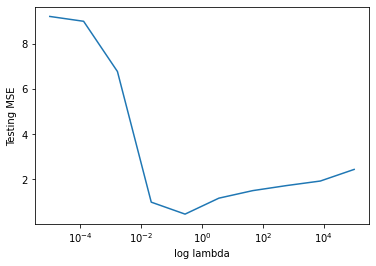

Best Loss: 0.4460214755433866, Best Lambda: 0.2782559402207126


In [ ]:
mses = []
lambdas_mse = np.logspace(-5, 5, 10)

best_loss = float('inf')
best_lambd_mse = None
X_test = get_features(7, x_test)
X_train = get_features(7, x_train)

for lambd in lambdas_mse:
    w = ridge(X_train, y_train, lambd)
    y_pred_test = X_test@w
    loss = mse(y_pred_test, y_test)
    mses.append(loss)
    if best_loss > loss:
        best_loss = loss
        best_lambd_mse = lambd

plt.plot(lambdas_mse, mses)
plt.xscale('log')
plt.xlabel('log lambda')
plt.ylabel('Testing MSE')
plt.show()

print(f'Best Loss: {best_loss}, Best Lambda: {best_lambd_mse}')

## 2.3 Bias Variance Trade Off

In order to further understand why we must tune $\lambda$, let's look at a very important concept in machine learning: Bias-Variance Trade Off. Please note that the mathematical expressions in this toy example have been simplified to help with understanding and convey the big ideas.  In order to understand this concept, let's start by observing two probability based expressions: $E[|\hat{w}- w|_2]$ and $Var[|\hat{w}|_2]$.

1.   $E[|\hat{w}- w|_2]$: This term is the *'bias'* of our model. At a high-level, this term represents the expected distance between our predicted model weights and the true model weights. $|\cdot|_2$ refers to the *euclidean norm*. $\hat{w}$ is the predicted weights from ridge regression. $w$ is the true underlying model's weights. Since we are dealing with vectors, $|\hat{w}- w|_2$ is essentially a 'distance' measure for how far $\hat{w}$ is from $w$. The $E[\cdot]$, here, refers to *expectation* of the enclosed quantity. However, the concept of expectation does not need to be understood for this example case. We will instead use *mean* as a proxy for expectation. (Note: The *real* bias term represents how far the predicted $y$ is from the real $y$. However, the math required in analyzing this would be a little more sticky and therefore *our toy* bias term compares the predicted weight with the real weight.)

2.   $Var[|\hat{w}|_2]$: This term is the *'variance'* of our model. This term can be likened to the spread of the predicted model weight. The $Var[\cdot]$ refers to the variance of the enclosed quantity. Like expectation, the concept of variance is not needed in this example. Instead, we will use the square of the *standard deviation*. (Note: The *real* variance term measures the spread of the predicted $y$. However, our toy variance term just measures the spread of the predicted weights.)

Why are these bias and variance expressions important? Let's answer some questions about it to better understand: 

**2.3.1. Intuitively we want both terms to be as close to 0 as possible (both terms are bounded by 0). Let's think about bias first. Why do we want bias to be close to 0?**

YOUR ANSWER HERE: The closer bias is to zero, the closer our predicted $\hat{w}$ is to the true model $w$. 

**2.3.2. Next, lets think about variance. Why should variance be close to 0?**

YOUR ANSWER HERE: A higher variance implies a greater spread in possible predicted model weights. A greater spread means that the possible predicted model weights will be all over the place yeilding less realiable results. Thus we want the variance to also be close to zero. 

---

Now, we understand that we must tune $\lambda$ in a way that minimizes both $E[|\hat{w}- w|_2]$ and $Var[|\hat{w}|_2]$. However, how do we calculate these two quantities? First we fix $\lambda$ and then repeatedly draw a dataset $(X_i, \vec{y}_i)$ and compute the associated $\hat{w}_i$, $r$ times.


$$\hat{w}_i = (X_i^TX_i + \lambda I)^{-1}X_i^T\vec{y}_i\\ 
(X_i, \vec{y}_i), \quad 1 \leq i \leq r
$$

Then compute the mean and standard deviation associated to the fixed $\lambda$:
$$ E[|\hat{w}(\lambda)- w|_2] \approx \text{mean}(|\hat{w}_i- w|_2) = \frac{1}{r} \sum_{i = 1}^r |\hat{w}_i- w|_2\\
Var[|\hat{w}(\lambda)|_2] \approx [\text{standard deviation}(|\hat{w}_i|_2)]^2 = \frac{1}{r} \sum_{i = 1}^r \lvert |\hat{w}_i|_2 - \mu \rvert^2, \quad
\mu = \frac{1}{r} \sum_{i = 1}^r |\hat{w}_i|_2
$$

This procedure is repeated over a range of $\lambda$'s. Note that $w$ is a known value in our experiment because we know what the true model is. However, this is often not the case in machine learning.

Now, lets observe how $E[|\hat{w}(\lambda)- w|_2]$ and $Var[|\hat{w}(\lambda)|_2]$ vary with $\lambda$.

---

**3.3. Fill in the following code to compute the bias and variance for each $\lambda$**

In [ ]:
def get_train_and_test_data(x_range, degree, function, train_test_split):
    X, Y = generate_data(x_range, function, 1, 80)

    indicies = np.arange(len(X))
    np.random.shuffle(indicies)
    split_index = int(train_test_split * len(X))
    train_indicies = indicies[:split_index]
    test_indicies = indicies[split_index:]


    X_train = get_features(degree, X[train_indicies])
    Y_train = Y[train_indicies]

    X_test = get_features(degree, X[test_indicies])
    Y_test = Y[test_indicies]

    return X_train, Y_train, X_test, Y_test

lambdas_bv = np.logspace(-5, 5, 50)

function = lambda x: x**3 + 3*x**2 - 2
w_true = np.array([-2, 0, 3, 1, 0, 0, 0, 0])
repeat = 600
biases = []
variances = []
X = np.linspace(-3, 1, 101, endpoint=True)
np.random.seed(46545645)

for lam in tqdm(lambdas_bv):
    w_hats_norm = []
    distance = []
    for _ in range(repeat):
        X_train, Y_train, _, _ = get_train_and_test_data(X, 7, function, 0.8)

        # TODO: Compute w_hat and then append appropriate values to w_hats_norm and distance
        ### BEGIN CODE ###
        w_hat = ridge(X_train, Y_train, lam)
        w_hats_norm.append(np.linalg.norm(w_hat))
        distance.append(np.linalg.norm(w_hat - w_true))
        ### END CODE ###

    # TODO: Take the mean and standard devaiation squared of the distance and w_hats_norm array, respectively
    ### BEGIN CODE ###
    variances.append(np.var(w_hats_norm))
    biases.append(np.mean(distance))
    ### END CODE ###

biases =  np.array(biases)
variances = np.array(variances)

100%|██████████| 50/50 [01:00<00:00,  1.21s/it]


**2.3.4. Plot bias and variance as lambda varies.**

Make sure to use a log scale for the lambda axis.

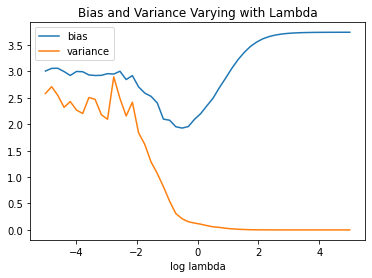

In [ ]:
### BEGIN CODE ###
plt.plot(np.log10(lambdas_bv), biases, label='bias')
plt.plot(np.log10(lambdas_bv), variances, label='variance')

plt.xlabel("log lambda")
plt.title("Bias and Variance Varying with Lambda")

plt.legend()
plt.show()
### END CODE ###

**2.3.5. How does *bias* change as $\lambda$ increases? Why does this make intuitive sense (Hint: think about how a larger $\lambda$ will force the magnitude of $\hat{w}$ to be smaller)?** 

As lambda increases, bias increases. This is because a larger $\lambda$ implies that the magnitude of $\hat{w}$ will decrease. The lambda is forcing $\hat{w}$ to act in a certain way. This means that $\hat{w}$ will deviate more from the true model $w$ because $\hat{w}$ has an implicit bias to have smaller magnitudes when this is not necessarily the case for $w$.

**2.3.6. How does *variance* change as lambda increases? Why does this make intuitive sense(Hint: similar to the previous question, think about how a larger $\lambda$ will force the magnitude of $\hat{w}$ to be smaller)**

As lambda increases, variance decreases. A larger magnitude $\lambda$ will force the magnitude of $\hat{w}$ to be closer to 0. Thus at a larger $\lambda$ there will be less spread in the predicted $\hat{w}$ because they will all be closer to the zero vector.

**2.3.7. What is the significance of the word *trade off* in bias variance trade off? (Hint: think about how variance and bias vary as lambda increases)**

The goal is to bring variance and bias as close to zero as possible. However, as lambda increases variance decreases (which is good) but bias increases (which is bad). Thus we see that in order to decrease one value (ie. variance) the other value (ie. bias) inevitably increases. Therefore, it is a trade off in which we are trying to minimize both values with the optimal lambda.

As stated above, we want both bias and variance to be close to zero. Therefore our objective is to minimize the combination of bias and variance. The exact objective function we want to minimize is $E[|\hat{w}- w|_2]^2 + Var[|\hat{w}|_2]$. The reason why the bias term is squared is beyond the scope of this notebook. The fancy way to write this notion in math is shown below:

$$\underset{\lambda}{\text{min }} E[|\hat{w}- w|_2]^2 + Var[|\hat{w}|_2]\\
\underset{\lambda}{\text{min }} \text{bias}^2 + \text{variance}
$$

Notice here that the *optimization variable* (the variable which we vary to try to reduce the objective function) is $\lambda$. This is because the only parameter that we can change in ridge regression is the $\lambda$ (aside from how we featurize the data).


**2.3.8. Plot how $\text{bias}^2 + \text{variance}$ varies with $\lambda$. Also plot MSE vs $\lambda$ graph from the previous section.**

The code will also compute the optimal $\lambda$ based on where the lowest $\text{bias}^2 + \text{variance}$ is achieved. 

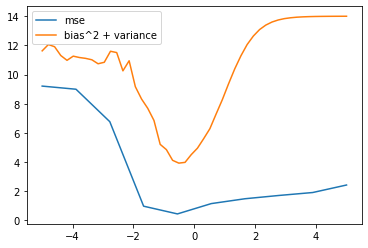

Best Lambda (according to bias^2 + variance): 0.30888435964774846 
Best Lambda (according to MSE): 0.2782559402207126 


In [ ]:
### BEGIN CODE ###
bias_squared_plus_variance = biases ** 2 + variances

plt.plot(np.log10(lambdas_mse), mses, label='mse')
plt.plot(np.log10(lambdas_bv), bias_squared_plus_variance, label='bias^2 + variance')

plt.legend()
plt.show()
### END CODE ###

ymin = np.min(bias_squared_plus_variance)
xpos = list(bias_squared_plus_variance).index(ymin)
best_lambd_bv = lambdas_bv[xpos]

print(f'Best Lambda (according to bias^2 + variance): {best_lambd_bv} ')
print(f'Best Lambda (according to MSE): {best_lambd_mse} ')

**2.3.9. How does the best lambda according to the $\text{bias}^2 + \text{variance}$ compare to the best lambda according to the MSE? (Hint: think about where the 'dip' occurs in both plots)**

Both plots show that the optimal lambda is around 0.3. This is a crucial concept in bias-variance trade off. The best lambda occurs where both the test error and the bias-variance error are minimized.